# Minimisation

An important component of computational chemistry is the study of atoms and molecules and their energy under different circumstances. 
There are a couple of different methods that can be used to calculate the energy of an atom or molecule: 
- quantum mechanical approaches: where an approximation to the Schrödinger equation is used to evaluate the energy of a molecule, such as [density functional theory](https://en.wikipedia.org/wiki/Density_functional_theory).
- classical atomistic models: where functional description of atomic and molecular interactions are used, and parameters are refined to give the best agreement with experimental methods, these models are referred to as [force fields](https://en.wikipedia.org/wiki/Force_field_(chemistry)). 

In this exercise, we will look at one of these force fields in detail and use minimisation to determine the minimum energy distance between to interacting atoms. 

## Lennard-Jones potential

The [Lennard-Jones potential](https://en.wikipedia.org/wiki/Lennard-Jones_potential) is a force field that describes the interation between two atoms. 
The aim of this potential is to describe the both the long-ranged attraction of two atoms due to the London dispersion force and the repulsion at short-range of the Pauli exclusion principle (the two atoms cannot sit on top of each other). 
The functional form of the Lennard-Jones potential is, 
$$ E(r_{ij}) = \frac{A}{r_{ij}^{12}} - \frac{B}{r_{ij}^6}, $$
where $E(r_{ij})$ is the potential energy, $r_{ij}$ is the distance between atoms $i$ and $j$, and $A$ and $B$ are interaction specific constants. 
These constants at the parameters that are determined from comparison with experimental methods. 
The first part of the above equation represents the Pauli exclusion principle, while the second part respresents the weaker dispersion forces (remember that negative energy indicates attraction). 


Below, is plotted the energy of the Lennard-Jones potential model, where the values of the interaction specific parameters are $1\times 10^{5}$ eVÅ<sup>12</sup> and $40$ eVÅ<sup>6</sup> for $A$ and $B$ respectively.

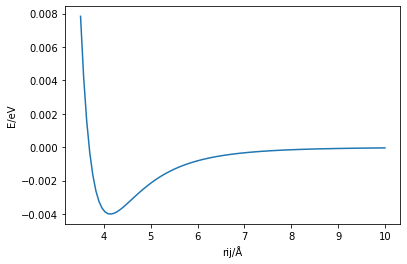

In [14]:
import numpy as np
import matplotlib.pyplot as plt

r = np.linspace(3.5, 10, 100)
plt.plot(r, 1e5 / (r ** 12) - 40 / (r ** 6))
plt.xlabel('rij/Å')
plt.ylabel('E/eV')
plt.show()

In the above plot, we can visually see where the energy is minimised, at around 4.1 Å. 
However, how can we use the computer to reach this same result? 
This is where we can use minimisation algorithms, in this case the algorithm that we will use is called the Newton-Raphson method (it was first derived by Isaac Newton).
The Newton-Raphson method works as follows: 
1. Select an initial guess for the minimum distance between the two atoms
2. Calculate the first and second derivatives of the energy at this distance
3. Update the distance between the atoms with the following relationship,
    $$ r_{\text{new}} = r_{\text{old}} = \frac{E'}{E''}, $$
    where $E'$ is the first derivative of the energy, $E''$ is the second derivative, and $r_{\text{old}}$ is the previous distance. 
4. Go to step 2. 
By repeating this process multiple times, it should be possible to find the minimum of the potential energy, which is the minimum energy distance.

## Exercise:
This weeks exercise is to write code that will perform a Newton Raphson minimisation and find the minimum energy distance. 
In order to achieve this, you should do the following:
  - Write a function for the energy, the first derivative and the second derivative
  - Implement the above algorithm, such that it will perform at least 10 iterations
  - Plot the function, and the minimum energy distance that is found in 10 iterations (the [`plt.axvline()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axvline.html) function will be useful for this visualisation).

Determine the minimum energy distance for each of the following sets of $A$ and $B$:
  - $A$ = $1\times 10^{5}$ eVÅ<sup>12</sup>, $B$ = $40$ eVÅ<sup>6</sup>
  - $A$ = $4\times 10^{5}$ eVÅ<sup>12</sup>, $B$ = $1$ eVÅ<sup>6</sup>